**Problem 2:** 

Multi-class Logistic Regression – Visualizing the Solution. You will repeat the previous problem but for the MNIST dataset which you will ﬁnd here: https://www.openml. org/d/554. MNIST is a dataset of handwritten digits, and is considered one of the easiest image recognition problems in computer vision. We will see here how well logistic regression does, as you did above on the CIFAR-10 subset. In addition, we will see that we can visualize the solution, and that in connection to this, sparsity can be useful. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
%matplotlib inline

Use the fetch openml command from sklearn.datasets to import the MNIST data set

In [0]:
mnist = datasets.fetch_openml(name='mnist_784',version='active') # Using fetch openML 

In [0]:
mnist.data


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
np.unique(mnist.target)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [0]:
print(mnist.DESCR) 

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [0]:
mnist.data.shape


(70000, 784)

In [0]:
print(mnist.DESCR) 

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [0]:
mnist.details

{'default_target_attribute': 'class',
 'file_id': '52667',
 'format': 'ARFF',
 'id': '554',
 'licence': 'Public',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495',
 'name': 'mnist_784',
 'processing_date': '2018-10-03 21:23:30',
 'status': 'active',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'upload_date': '2014-09-29T03:28:38',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'version': '1',
 'visibility': 'public'}

In [0]:
X = mnist["data"]

In [0]:
y= mnist["target"]

In [0]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [0]:
X.shape

(70000, 784)

In [0]:
y.shape

(70000,)

In [0]:
from sklearn.model_selection import train_test_split

Choose a reasonable train-test split, and again run multi-class logistic regression on these using the cross entropy loss, as you did above. Try to optimize the hyperparameters. 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,shuffle=False)

In [0]:
X_train.shape

(52500, 784)

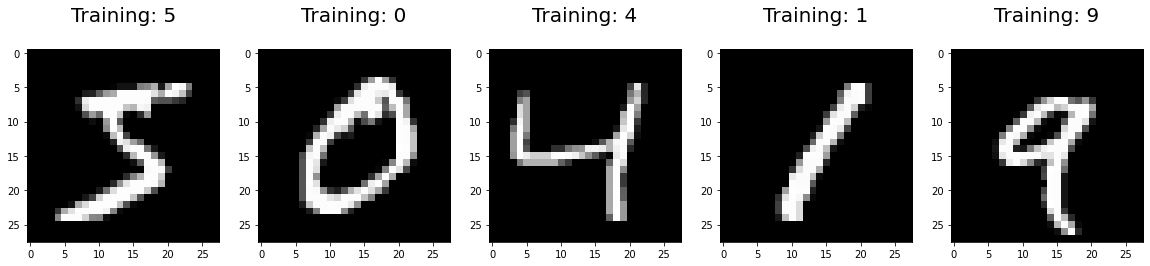

In [0]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %s\n' % label, fontsize = 20)

In [0]:
Log_Reg=LogisticRegression()

In [0]:
folds= 5
sk_fold=StratifiedKFold(n_splits=folds,shuffle=True,random_state=1001)

In [0]:
parameters={'solver':['saga'],'multi_class':['multinomial'],'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}

In [0]:

Log_Reg=LogisticRegression()
grid_search = GridSearchCV(Log_Reg,parameters,n_jobs=4,cv=sk_fold,scoring='accuracy',verbose=10,refit=True)

In [0]:
grid_search.fit(X_train,y_train)``## Perform grid search CV to tune the hyperparameters

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 29.3min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 40.2min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 73.4min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 102.0min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 132.8min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 166.1min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 205.6min
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed: 258.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1001, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'multi_class': ['multinomial'],
                         'penalty': ['l1', 'l2'], 'solver': ['saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
           

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 29.4min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 40.7min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 73.8min


In [0]:
# Fitting 5 folds for each of 14 candidates, totalling 70 fits
# [Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
# [Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 29.3min
# [Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 40.2min
# [Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 73.4min
# [Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 102.0min
# [Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 132.8min
# [Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 166.1min
# [Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 205.6min
# [Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed: 258.1min finished
# /usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
#   "the coef_ did not converge", ConvergenceWarning)
# GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1001, shuffle=True),
#              error_score=nan,
#              estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
#                                           fit_intercept=True,
#                                           intercept_scaling=1, l1_ratio=None,
#                                           max_iter=100, multi_class='auto',
#                                           n_jobs=None, penalty='l2',
#                                           random_state=None, solver='lbfgs',
#                                           tol=0.0001, verbose=0,
#                                           warm_start=False),
#              iid='deprecated', n_jobs=4,
#              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#                          'multi_class': ['multinomial'],
#                          'penalty': ['l1', 'l2'], 'solver': ['saga']},
#              pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
#              scoring='accuracy', verbose=10)Fitting 5 folds for each of 14 candidates, totalling 70 fits
# [Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
# [Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 29.4min


Fitting 5 folds for each of 14 candidates, totalling 70 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 29.3min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 40.2min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 73.4min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 102.0min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 132.8min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 166.1min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 205.6min
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed: 258.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1001, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'multi_class': ['multinomial'],
                         'penalty': ['l1', 'l2'], 'solver': ['saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=10)Fitting 5 folds for each of 14 candidates, totalling 70 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 29.4min


In [0]:
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1001, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'multi_class': ['multinomial'],
                         'penalty': ['l1', 'l2'], 'solver': ['saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=10)

In [0]:
# Best Parameter after grid search gives penalty as l2 and C=1.0
log_best=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)

In [0]:
log_best.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
log_best.predict(X_test)

array(['9', '2', '6', ..., '4', '5', '6'], dtype=object)

In [0]:
log_best.score

<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

 Report your training and test loss from above

In [0]:
score_train = log_best.score(X_train, y_train)
print(score_train)

0.9334476190476191


The training score/accuracy with l2 penalty and C=1.0 is 0.9334476190476191



In [0]:
score = log_best.score(X_test, y_test)
print(score)

0.9280571428571428


The test score/accuracy with l2 penalty and C=1.0 is 0.9280571428571428



Choose an l1 regularizer (penalty), and see if you can get a sparse solution with almost as good accuracy. 

In [0]:
# Using penalty=l1 and C=1.0

log_best_l1=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)

In [0]:
log_best_l1.fit(X_train,y_train) # Fit the model 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
log_best_l1.score(X_train,y_train)

0.9377714285714286

Training Score for Logistic Regression using Penalty = l1 is 0.9377714285714286

In [0]:
log_best_l1.predict(X_test)

array(['9', '2', '6', ..., '4', '5', '6'], dtype=object)

In [0]:
log_best_l1.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Test Score for Logistic Regression using Penalty = l1 is 0.9277142857142857

In [0]:
log_best_l1.score(X_test,y_test)

0.9277142857142857

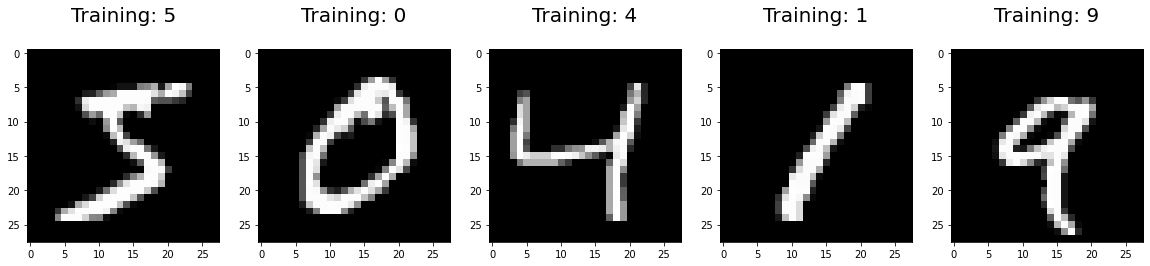

In [0]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %s\n' % label, fontsize = 20)

In [0]:
#logistic regression after decreasing the C value to 0.001 and using l1

log_reg_C1=LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#logistic regression after decreasing the C value to 0.0001

log_reg_C2=LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#logistic regression after decreasing the C value to 0.005

log_reg_C3=LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
log_reg_C3.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
log_reg_C2.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
log_reg_C3.score(X_train,y_train)

0.9030476190476191

In [90]:
log_reg_C3.score(X_test,y_test)

0.9098857142857143

In [0]:
log_reg_C2.predict(X_test)

array(['9', '2', '6', ..., '4', '5', '6'], dtype=object)

When we make the model more sparse and try to decrease the value of C to 0.0001 we get training score of 0.9030476190476191

In [0]:
log_reg_C2.score(X_train,y_train) 

0.9030476190476191

When we make the model more sparse and try to decrease the value of C to 0.0001 we get testing score of 0.9098285714285714

In [0]:
log_reg_C2.score(X_test,y_test)

0.9098285714285714

In [80]:
log_reg_C1.fit(X_train,y_train) # Penalty = L1 and C = 0.001

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions_C1=log_reg_C1.predict(X_test)

The training score for C=0.001 is 0.9292761904761905 and penalty is l1

In [83]:
log_reg_C1.score(X_train,y_train)

0.9292761904761905

The testing score for C=0.001 is 0.9271428571428572 and penalty is l1

In [81]:
log_reg_C1.score(X_test,y_test)

0.9271428571428572

In [86]:
print(classification_report(y_test,predictions_C1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1719
           1       0.96      0.98      0.97      1929
           2       0.93      0.90      0.91      1787
           3       0.91      0.91      0.91      1790
           4       0.94      0.94      0.94      1735
           5       0.90      0.86      0.88      1574
           6       0.95      0.96      0.95      1672
           7       0.93      0.94      0.93      1844
           8       0.88      0.89      0.88      1721
           9       0.91      0.91      0.91      1729

    accuracy                           0.93     17500
   macro avg       0.93      0.93      0.93     17500
weighted avg       0.93      0.93      0.93     17500



Note that in Logistic Regression, the coeﬃcients returned (i.e., the β’s) are the same dimension as the data. Therefore we can pretend that the coeﬃcients of the solution are an image of the same dimension, and plot it. Do this for the 10 sets of coeﬃcients that correspond to the 10 classes. You should observe that, at least for the sparse solutions, these “kind of” look like the digits they are classifying.

In [0]:
image_coeff = log_reg_C.coef_

In [0]:
image_coeff

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
image_coeff.shape

(10, 784)

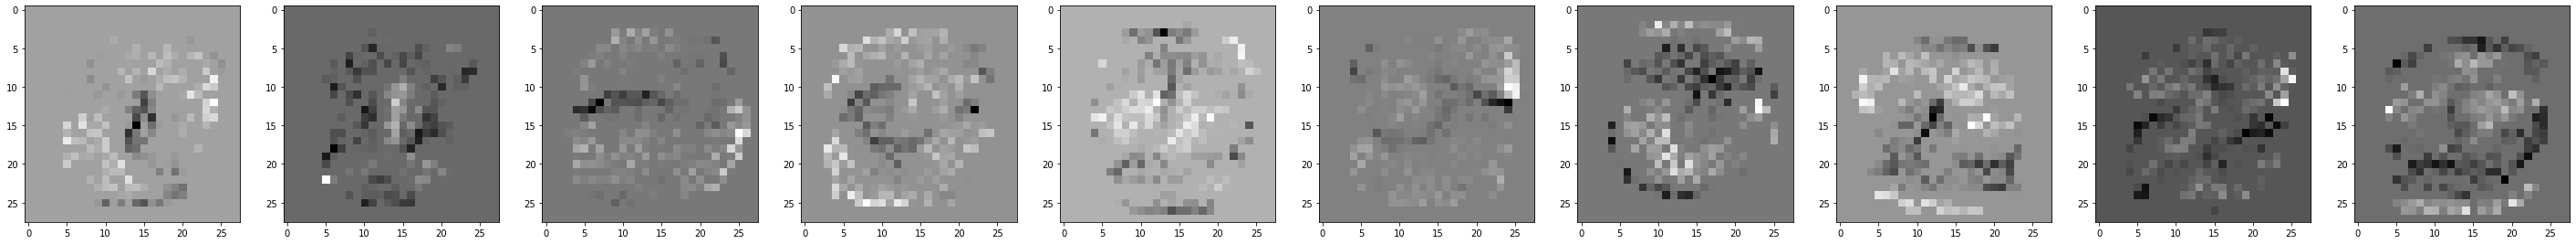

In [0]:
# Plotting the image using the Logistic Regression Coefficient
plt.figure(figsize=(50,10))
for index, image in enumerate((image_coeff[0:10])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
